In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from copy import copy
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,20)



In [2]:
import os
os.listdir()

['__pycache__',
 'images',
 'resources',
 'main.py',
 'lab.ipynb',
 '.idea',
 '.ipynb_checkpoints',
 'homework_ocr.ipynb',
 'image_processing',
 'image_commons.py']

In [3]:
def is_valid_point(max_with,max_height):
    def is_valid(x,y):
        return 0<=x<max_with and 0<=y< max_height
    return is_valid

def enlarge_pixels(m:np.ndarray,r:int):
    new_mat=np.zeros(m.shape)
    is_valid = is_valid_point(m.shape[1],m.shape[0])
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if m[i,j]>0:
                for x in range(j-r,j+r+1):
                    for y in range(i-r,i+r+1):
                        if is_valid(x,y):
                            new_mat[y,x]=m[i,j]
    return new_mat

In [4]:

def find_pattern(img, pat, threshold,enlarge:int = None):
    
    if np.mean(img)>128:
        r_img = 255- img
        r_pat = 255-pat
        inversed = True
        print("inversed")
    else:
        r_img = copy(img)
        r_pat=copy(pat)
        inversed = False
        
        
    # why img shape here?
    fpat = np.fft.fft2(np.rot90(r_pat,2),r_img.shape)  # reverse picture by rotating 180 deg
    fimg = np.fft.fft2(r_img)

    m = np.multiply(fimg,fpat)# element-wise multiplication
    
    corr = np.fft.ifft2(m)
    corr = np.abs(corr)
    corr = corr.astype(float)
    
    cor2= copy(corr)
    threshold = np.max(corr) *threshold
    
    cor2[corr<threshold]=0
    cor2[corr>=threshold]=255

    if enlarge:
        print("enlarging")
        cor2=enlarge_pixels(cor2,enlarge)
    if inversed:
        return img - cor2,cor2
    else:
        return img + cor2,cor2

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


inversed
enlarging


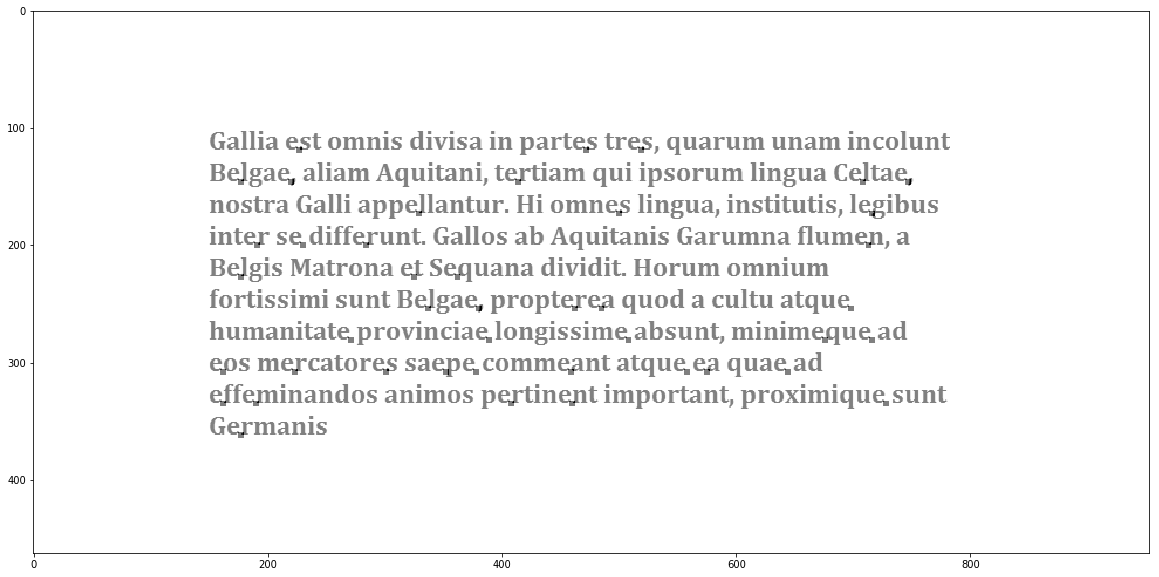

In [15]:
pat = ndimage.imread('images/galia_e.png',flatten=True)
img = ndimage.imread('images/galia.png',flatten=True)
import matplotlib.cm as cm
result,cor2 = find_pattern(img,pat,0.95,2)
plt.imshow(result,cm.gray)
plt.show()

In [10]:
_,paternn_ocurrences = ndimage.measurements.label(cor2)
print(paternn_ocurrences)

43


# Fish

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


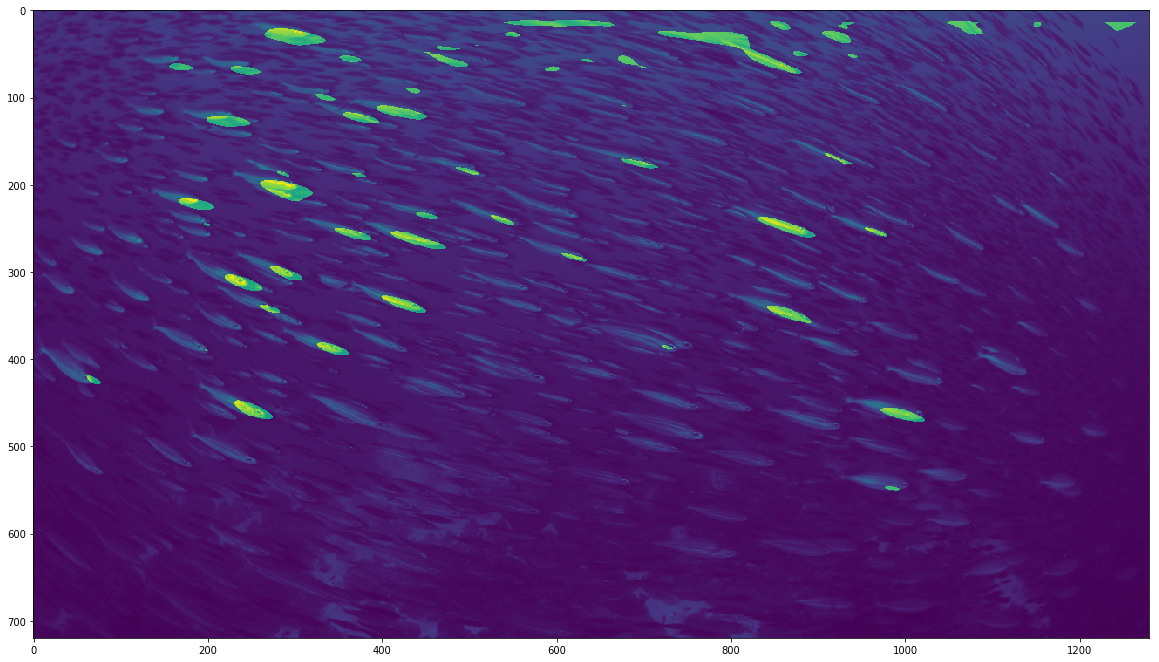

In [13]:
pat = ndimage.imread('images/fish1.png',flatten=True)
img = ndimage.imread('images/school.jpg',flatten=True)

result,cor2 = find_pattern(img,pat,0.65)
plt.imshow(result)
plt.show()

In [14]:
_,paternn_ocurrences = ndimage.measurements.label(cor2)
print(paternn_ocurrences)

56
